In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2021-10-22 16:44:06.907236


<h1>Korrelaatio</h1>

Määrällisten muuttujien välisiä riippuvuuksia selvitellään korrelaatiokertoimien ja hajontakaavioiden avulla.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiikan tulostaminen Jupyter notebookiin
# Nykyisissä kirjastoversioissa ei enää tarpeellinen
%matplotlib inline

In [3]:
# Data, jossa yritysasiakkaiden mielikuvia tavarantoimittajayrityksestä
# Asteikko: 0 = huono - 10 = erinomainen
df = pd.read_excel('http://taanila.fi/data3.xlsx')
df.head()

,nro,toimitusnopeus,hintataso,joustavuus hinnoissa,toimittajan imago,palvelu,myyntihenkilöstön imago,tuotteiden laatu,yleinen tyytyväisyys
0,1,4.1,0.6,6.9,4.7,2.4,2.3,5.2,4.2
1,2,1.8,3.0,6.3,6.6,2.5,4.0,8.4,4.3
2,3,3.4,5.2,5.7,6.0,4.3,2.7,8.2,5.2
3,4,2.7,1.0,7.1,5.9,1.8,2.3,7.8,3.9
4,5,6.0,0.9,9.6,7.8,3.4,4.6,4.5,6.8


In [4]:
# Pudotan nro-sarakkeen pois
df = df.drop('nro', axis = 1)

In [5]:
# Korrelaatiokertoimet
df.corr()

,toimitusnopeus,hintataso,joustavuus hinnoissa,toimittajan imago,palvelu,myyntihenkilöstön imago,tuotteiden laatu,yleinen tyytyväisyys
toimitusnopeus,1.000000,-0.349225,0.509295,0.050414,0.611901,0.077115,-0.482631,0.650632
hintataso,-0.349225,1.000000,-0.487213,0.272187,0.512981,0.186243,0.469746,0.028395
joustavuus hinnoissa,0.509295,-0.487213,1.000000,-0.116104,0.066617,-0.034316,-0.448112,0.524814
toimittajan imago,0.050414,0.272187,-0.116104,1.000000,0.298677,0.788225,0.199981,0.475934
palvelu,0.611901,0.512981,0.066617,0.298677,1.000000,0.240808,-0.055161,0.631233
myyntihenkilöstön imago,0.077115,0.186243,-0.034316,0.788225,0.240808,1.000000,0.177294,0.340909
tuotteiden laatu,-0.482631,0.469746,-0.448112,0.199981,-0.055161,0.177294,1.000000,-0.283340
yleinen tyytyväisyys,0.650632,0.028395,0.524814,0.475934,0.631233,0.340909,-0.283340,1.000000


<AxesSubplot:>

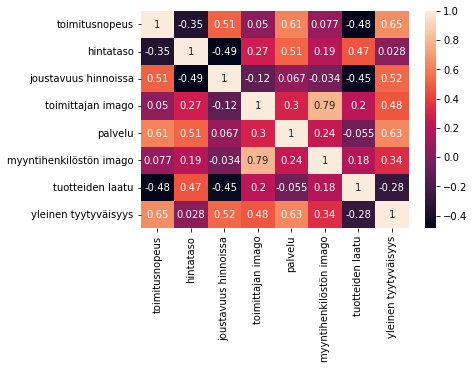

In [6]:
# Seaborn-kirjaston heatmap värittää korrelaatiokertoimia
# annot = True näyttää värien lisäksi myös lukuarvot
sns.heatmap(df.corr(), annot = True)

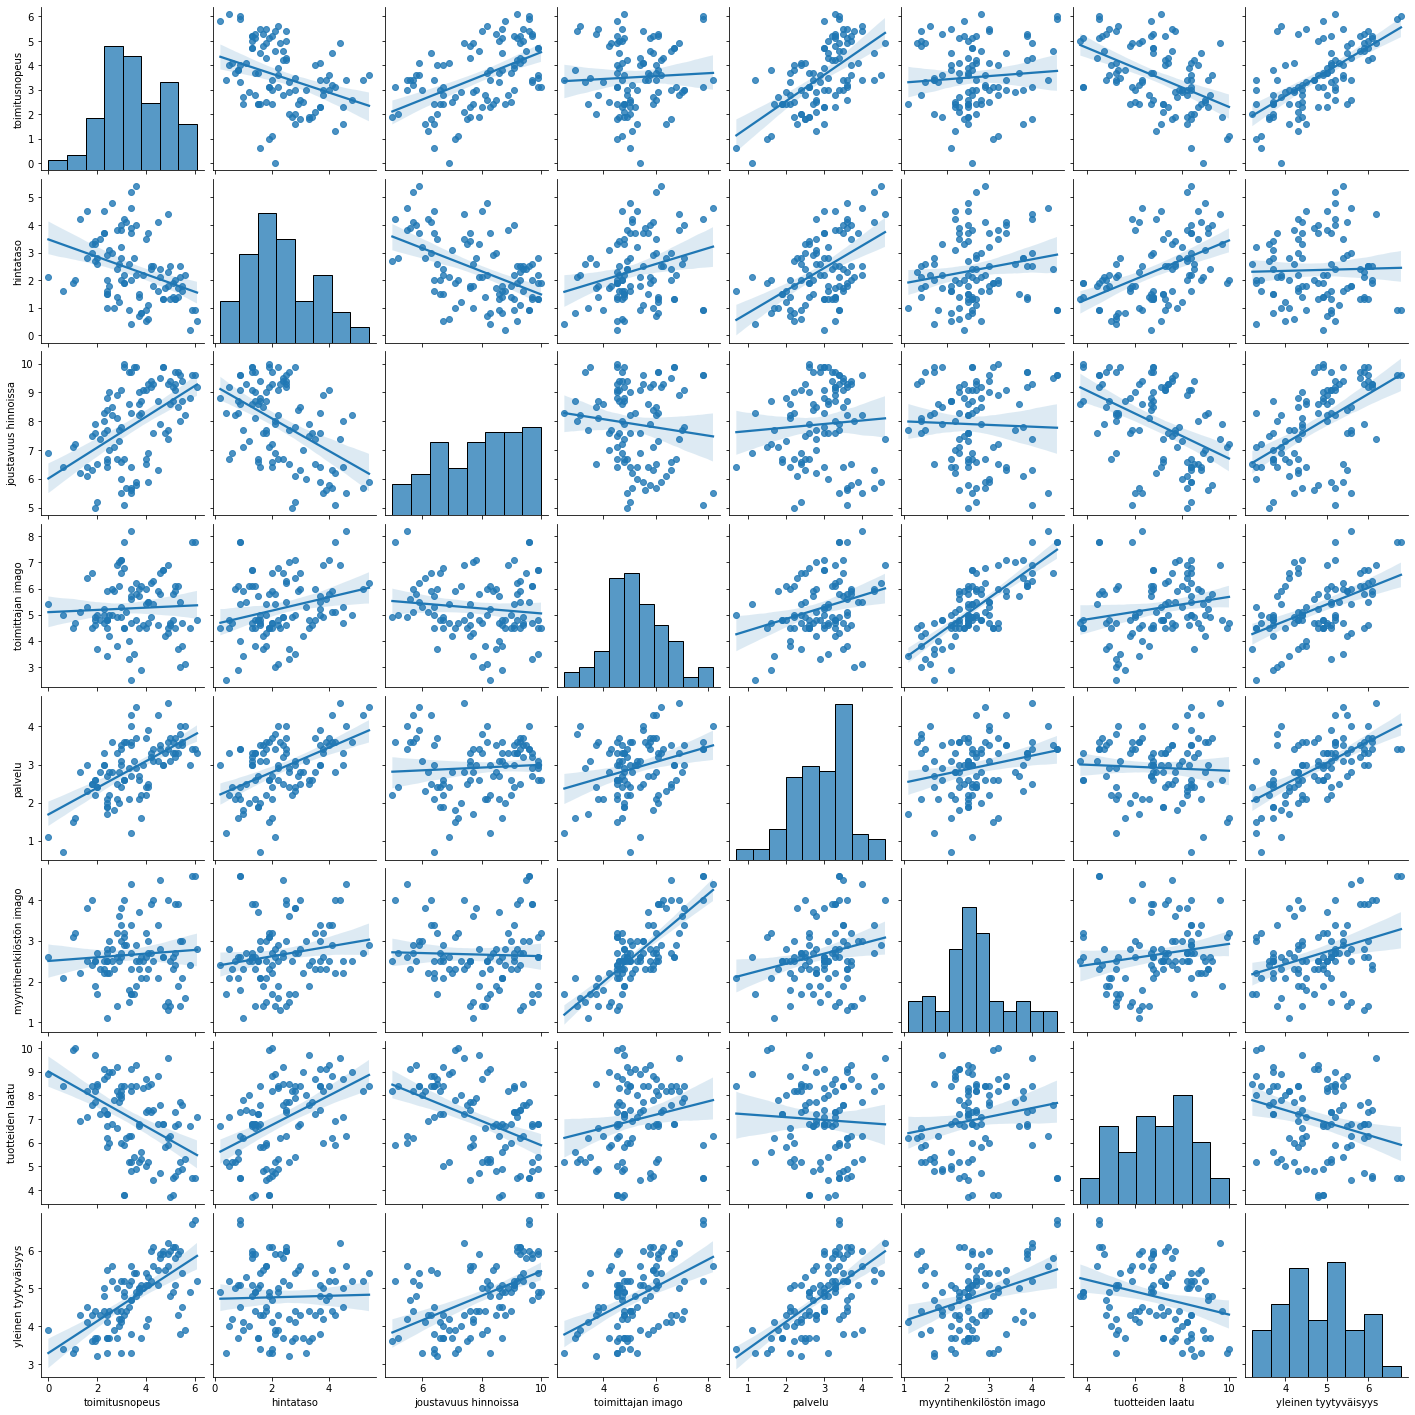

In [7]:
# Korrelaatioiden visuaalinen tarkastelu hajontakaavioina
# Pairplotin laskeminen näin monesta muuttujasta kestää hetken aikaa!
sns.pairplot(df, kind = 'reg')

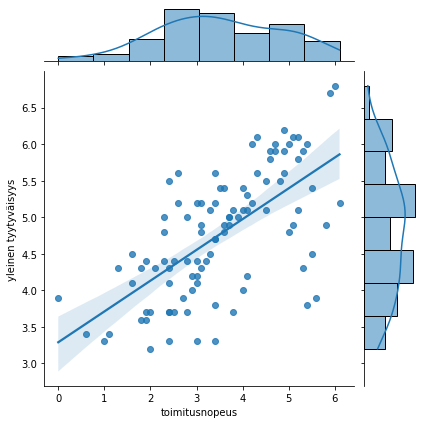

In [8]:
# Yksittäisen muuttujaparin tarkastelu hajontakaaviona
sns.jointplot(data = df, x = 'toimitusnopeus', y = 'yleinen tyytyväisyys', kind = 'reg')

<h2>Ovatko korrelaatiokertoimet tilastollisesti merkitseviä?</h2>

Otoksessa havaitut korrelaatiokertoimet voivat olla liian lähellä nollaa, jotta niitä voisi yleistää laajempaan perusjoukkoon, josta otos on otettu. Kyseessä voi olla otantavirheen (sattuman) aiheuttama korrelaatio.

Korrelaatiokerrointa sanotaan merkitseväksi, jos sen perusteella voidaan tehdä yleistys laajempaan perusjoukkoon, josta otos on otettu. Korrelaatiokertoimen merkitsevyyttä voit testata laskemalla niin kutsuttu <b>p-arvo</b>. Mitä pienempi p-arvo, sitä merkitsevämpi korrelaatio. Yleensä alle 0,05 (5 %) suuruisia p-arvoja pidetään osoituksena merkitsevästä korrelaatiosta.

Korrelaatiokertoimeen liittyvän p-arvon voit laskea siihen tarkoitetulla testillä (pearsonr).

Jos tarkasteltavissa muuttujissa on puuttuvia arvoja, niin korrelaatiokertoimeen liittyvän p-arvon laskenta ei onnistu ennen puuttuvia arvoja sisältävien rivien poistamista.

In [9]:
from scipy.stats import pearsonr 
for muuttuja in df:
    df_dropna = df.dropna(subset=[muuttuja, 'yleinen tyytyväisyys'])
    print(muuttuja, pearsonr(df_dropna['yleinen tyytyväisyys'], df_dropna[muuttuja]))

toimitusnopeus (0.6506323301389191, 2.354357209803324e-13)
hintataso (0.028394665880510234, 0.7791450989655391)
joustavuus hinnoissa (0.5248141510750397, 2.0815396346392862e-08)
toimittajan imago (0.4759338314260012, 5.599028749180165e-07)
palvelu (0.631232901641948, 1.917952074232071e-12)
myyntihenkilöstön imago (0.3409093027606839, 0.0005188847493396814)
tuotteiden laatu (-0.28333980318451, 0.004282584841192087)
yleinen tyytyväisyys (1.0, 0.0)


Edellä on tarkasteltu eri osatekijöiden korrelaatiota yleisen tyytyväisyyden kanssa. Pearsonr palauttaa kaksi arvoa: korrelaatiokertoimen ja p-arvon.

Lasketun mukaan tilastollisesti merkitsevästi yleisen tyytyväisyyden kanssa korreloivat kaikki muut paitsi hintataso.

<h2>Lisätietoa</h2>

- Tietoa korrelaatiokertoimen testauksesta:
https://tilastoapu.wordpress.com/2011/11/01/10-korrelaatio-ja-sen-merkitsevyys/

- Lisätietoa p-arvoista:
https://tilastoapu.wordpress.com/2012/02/14/p-arvo/

- p-arvoja Pythonilla eri testaustilanteisiin:
https://nbviewer.jupyter.org/github/taanila/selittava/blob/main/p.ipynb

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/